Epoch 1/50
4/4 [==============================] - 0s 2ms/step - loss: 0.9751
Epoch 2/50
4/4 [==============================] - 0s 2ms/step - loss: 0.7167
Epoch 3/50
4/4 [==============================] - 0s 1ms/step - loss: 0.5575
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 0.4501
Epoch 5/50
4/4 [==============================] - 0s 2ms/step - loss: 0.3793
Epoch 6/50
4/4 [==============================] - 0s 1ms/step - loss: 0.3221
Epoch 7/50
4/4 [==============================] - 0s 2ms/step - loss: 0.2807
Epoch 8/50
4/4 [==============================] - 0s 1ms/step - loss: 0.2464
Epoch 9/50
4/4 [==============================] - 0s 2ms/step - loss: 0.2194
Epoch 10/50
4/4 [==============================] - 0s 1ms/step - loss: 0.1974
Epoch 11/50
4/4 [==============================] - 0s 2ms/step - loss: 0.1796
Epoch 12/50
4/4 [==============================] - 0s 1ms/step - loss: 0.1646
Epoch 13/50
4/4 [==============================] - 0s 2ms/step - loss: 0.

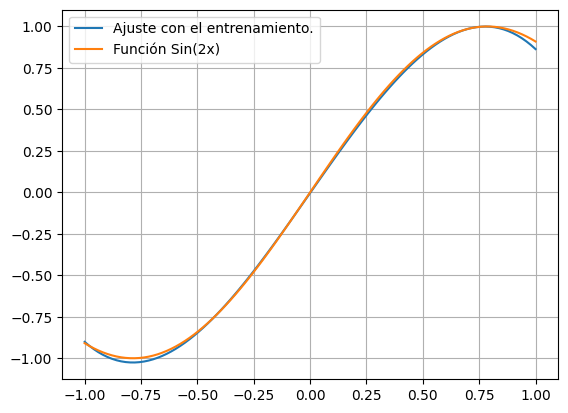

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Layer
from tensorflow.keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt
import math as mt

loss_tracker = keras.metrics.Mean(name = "loss")

class Polynomial(tf.keras.layers.Layer):
    def __init__(self, num_outputs):
        super(Polynomial, self).__init__()
        self.num_outputs = num_outputs
        self.kernel = self.add_weight("kernel", shape = [self.num_outputs])
        
    def call(self, inputs):
        inputs = tf.convert_to_tensor(inputs)
        if (inputs.shape == ()):
            inputs = (inputs,)
        elif (len(inputs.shape) == 1):
            inputs = tf. expand_dims(inputs, axis = 1)
        
        modes = tf.concat([tf.ones_like(inputs), inputs, inputs**2, inputs**3],
                          axis = 1)
        return tf.tensordot(modes, self.kernel,1)

class Sin(keras.Model):
    def train_step(self, data):
        batch = 10 
        x = tf.random.uniform((batch,), minval = -1, maxval = 1)
        fun = tf.math.sin(2*x)
        
        with tf.GradientTape() as tape: 
            y = self(x, training = True)
            loss = keras.losses.mean_squared_error(y, fun)
        
        grads = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        loss_tracker.update_state(loss)
        
        return {"loss": loss_tracker.result()}
    
"""
Creación del modelo: 
"""

inputs = keras.Input(shape=(1,))
x = Polynomial(4)(inputs)

model = Sin(inputs,x)
model.compile(optimizer = Adam(learning_rate = 0.5), metrics =["loss"])

x = tf.linspace(-1,1,100)
history = model.fit(x, epochs = 50, verbose = 1)

"""
Visualización del modelo:
"""

x_test = tf.linspace(-1, 1, 100)
fun = model.predict(x_test)

plt.plot(x_test, fun, label = "Ajuste con el entrenamiento.")
plt.plot(x_test, np.sin(2*x), label = "Función Sin(2x)")
plt.grid()
plt.legend()

plt.show()